### Machine Learning Modeling 

#### In this project,  three different machine learning models were used to predict house prices using a cleaned dataset. The goal was to find out which model gives us the most accurate predictions by minimizing the error between actual prices and predicted prices.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


# Load the dataset
df = pd.read_csv('/Users/sa3/Desktop/House Prices - Advanced Regression Techniques/Data/cleaned_test_data.csv')


In [110]:
df.shape
df.head(20)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LogSalePrice
0,208500,7,1710,2,548,856,856,2,8,2003,2003,12.247699
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,12.109016
2,223500,7,1786,2,608,920,920,2,6,2001,2002,12.317171
3,140000,7,1717,3,642,756,961,1,7,1915,1970,11.849405
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,12.429220
5,143000,5,1362,2,480,796,796,1,5,1993,1995,11.870607
6,307000,8,1694,2,636,1686,1694,2,7,2004,2005,12.634606
7,200000,7,2090,2,484,1107,1107,2,7,1973,1973,12.206078
8,129900,7,1774,2,468,952,1022,2,8,1931,1950,11.774528
9,118000,5,1077,1,205,991,1077,1,5,1939,1950,11.678448


In [111]:
# Prepare features and target
X = df.drop(columns='SalePrice')
y = df['SalePrice']

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)  # 0.25 x 0.8 = 0.2

print(f"Train shape: {X_train.shape}, Validation shape: {X_valid.shape}, Test shape: {X_test.shape}")

Train shape: (876, 11), Validation shape: (292, 11), Test shape: (292, 11)


In [112]:

# Random Forest
model_rfr = RandomForestRegressor(random_state=0)
model_rfr.fit(X_train, y_train)
pred_rfr = model_rfr.predict(X_valid)
mae_rfr = mean_absolute_error(y_valid, pred_rfr)
print("Random Forest MAE:", mae_rfr)

Random Forest MAE: 943.3546917808218


In [113]:
# Gradient Boosting
model_gbr = GradientBoostingRegressor(random_state=0)
model_gbr.fit(X_train, y_train)
pred_gbr = model_gbr.predict(X_valid)
mae_gbr = mean_absolute_error(y_valid, pred_gbr)
print("Gradient Boosting MAE:", mae_gbr)

Gradient Boosting MAE: 1179.1772809728755


In [114]:
# XGBoost
model_xgb = XGBRegressor(
    learning_rate=0.03,
    n_estimators=200,
    objective='reg:squarederror',
    random_state=0
)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_valid)
mae_xgb = mean_absolute_error(y_valid, pred_xgb)
print("XGBoost MAE:", mae_xgb)

XGBoost MAE: 1775.789276541096


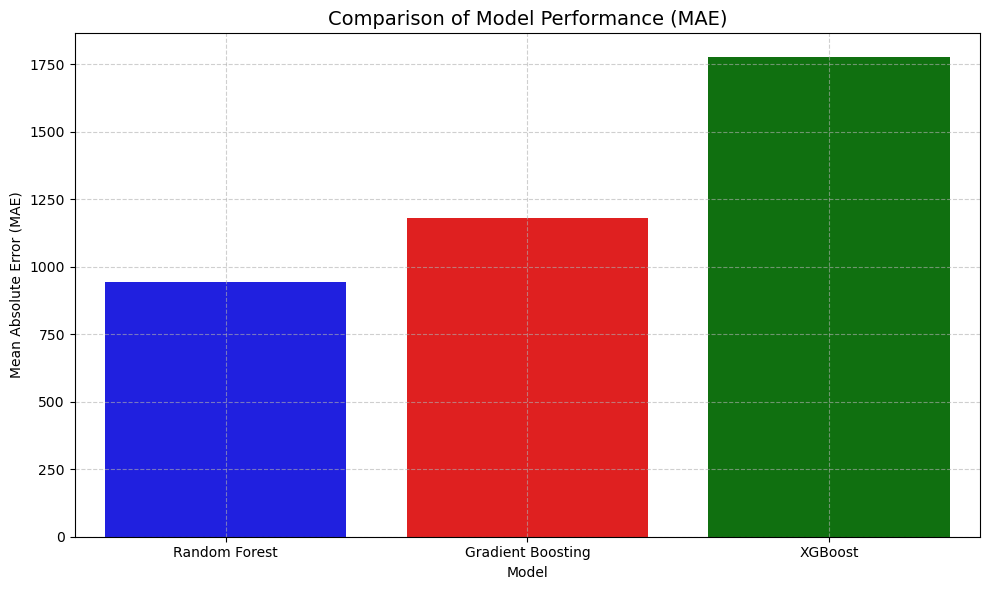

In [115]:
# Compare model performance
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost']
mae_values = [mae_rfr, mae_gbr, mae_xgb]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mae_values, palette=['blue', 'red', 'green'])
plt.title('Comparison of Model Performance (MAE)', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


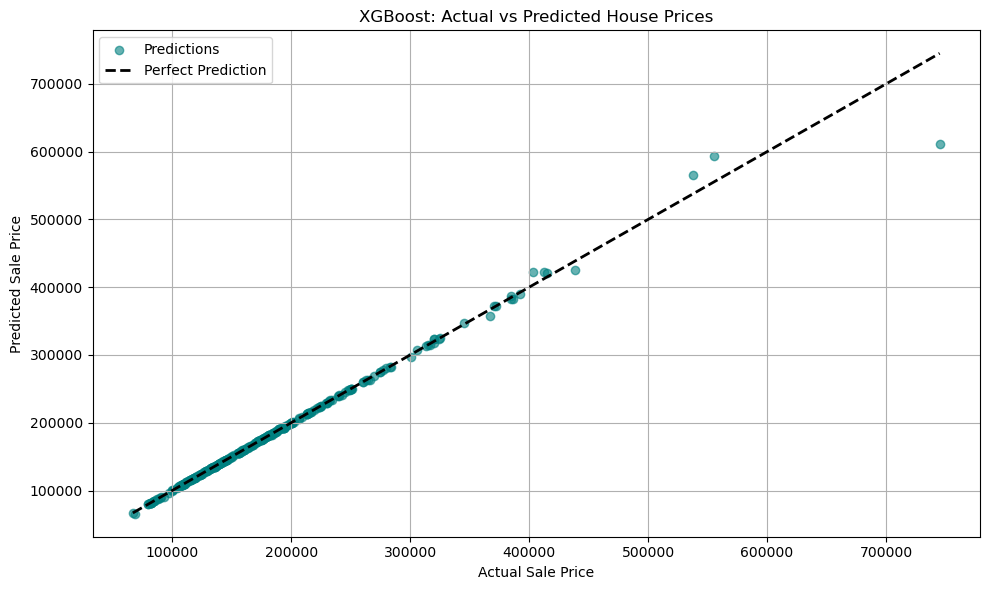

In [116]:
# Predict on the test set
test_predictions = model_xgb.predict(X_test)

# Scatter plot to compare actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='teal', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted House Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. Data Preparation
- I started with a cleaned dataset containing numeric features and the target variable SalePrice.
- The data was split into training, validation, and test sets to help prevent overfitting and allow fair model evaluation.
- I used StandardScaler to normalize the input features, making the models perform better, especially for algorithms sensitive to feature scales.

2.  Models Used
- Random Forest Regressor
An ensemble of decision trees.
Works well with high-dimensional data and handles non-linear relationships.
MAE (Mean Absolute Error): Shows how far off the predictions were, on average.

- Gradient Boosting Regressor
Builds trees one at a time, learning from the previous ones’ mistakes.
More sensitive to overfitting but usually more accurate.
Also evaluated using MAE.

- XGBoost Regressor
An optimized and regularized version of Gradient Boosting.
Very popular for structured data competitions (like Kaggle).
Provided the best prediction accuracy out of the three models in this project.

3. Model Evaluation
I used Mean Absolute Error (MAE) to compare the models. Lower MAE = better predictions.
A bar chart was created to visually compare model performances.
A scatter plot was used to check how close the predicted prices were to the actual prices.

4. Final Results
All three models gave good predictions, but XGBoost performed the best, meaning it made the most accurate predictions overall.
This shows that machine learning can effectively estimate housing prices using available data.

5. What I Learned
How to clean and prepare real-world data.
How to split and scale data for machine learning.
How to train and evaluate multiple regression models.
How to visualize and interpret prediction results.